[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/display_list_of_file_name_vs_time_stamp)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
from __code.display_file_names_vs_time_stamp import DisplayFileNamesVsTimeStamp

%matplotlib notebook

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

** Using Debugging Mode! **


VBox(children=(HBox(children=(Label(value='IPTS-'), Text(value='', layout=Layout(width='10%')), Label(value='DOES NOT EXIST!', layout=Layout(width='20%'), _dom_classes=('result_label',)))), Label(value='OR'), HBox(children=(Label(value='Select Folder', layout=Layout(width='20%')), Select(layout=Layout(height='300px'), options=('BraggEdge', 'Brianne', 'DOE_letters', 'FITSimages', 'IPTS-12534', 'IPTS-13639_resonance_shawn', 'IPTS-14832', 'IPTS-15177', 'IPTS-16212', 'IPTS-16259', 'IPTS-16475', 'IPTS-16893', 'IPTS-17099', 'IPTS-17685-Siddharth', 'IPTS-17981', 'IPTS-18580', 'IPTS-18806', 'IPTS-18813', 'IPTS-19037', 'IPTS-19213', 'IPTS-19558', 'IPTS-19621-CLOCK', 'IPTS-19626', 'IPTS-19799', 'IPTS-19921-Charles', 'IPTS-19943-kashif', 'IPTS-20139-Hao-Liu', 'IPTS-20209-TOPAZ', 'IPTS-21115', 'IPTS-Das-Saikat', 'IPTS-raw', 'IPTS_test_normalization', 'IPTS_testing_time_spectra', 'ImagesToRegisterForGian', 'Indu', 'Keita_code', 'Pour_ibeatles_video', 'ResonanceImaging', 'SENSITIVE', 'SarmaGUI', 'SphereCoordinates3D', 'TempData', 'gian', 'iBeatles_debugging', 'shared', 'testing_Ed_algo_water_intake'), value='BraggEdge'))), Button(button_style='info', description='HELP', style=ButtonStyle())))

# Select Images

In [2]:
o_file_time_stamp = DisplayFileNamesVsTimeStamp(working_dir=system.System.get_working_dir())
o_file_time_stamp.select_image_folder()

VBox(children=(Label(value='Select Raw Images ...', layout=Layout(width='250px')), VBox(children=(HBox(children=(HBox(children=(Text(value='/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115', description='Location: ', layout=Layout(width='100%'), placeholder=''), Button(description='Jump', layout=Layout(border='1px solid gray', margin='5px 10px', width='100px'), style=ButtonStyle())), layout=Layout(border='1px solid lightgrey', margin='5px 50px 5px 5px', padding='3px', width='100%')),)), HBox(children=(VBox(children=(HBox(children=(Label(value='Search:'), Text(value='', layout=Layout(width='50%'))), layout=Layout(justify_content='flex-end')), SelectMultiple(description='Select', layout=Layout(height='260px', width='99%'), options=(' .', ' ..', ' .DS_Store             |     Thu Jul 26 10:25:53 2018', ' Huggies_3cm_thick     |     Directory', ' test                  |     Directory'), value=())), layout=Layout(width='80%')), VBox(children=(Button(description='Change directory', layout=Layout(border='1px solid gray', margin='5px 40px'), style=ButtonStyle()), Button(description='Select', layout=Layout(border='1px solid blue', margin='auto 40px 5px'), style=ButtonStyle())))), layout=Layout(border='1px solid lightgrey', margin='5px', padding='10px')))), HTML(value='')))

HBox(children=(Label(value='Retrieving Time Stamp', layout=Layout(width='20%')), IntProgress(value=0, layout=Layout(width='50%'), max=49)))

#  Display Time Stamp (relative and absolute offsets)

<IPython.core.display.Javascript object>


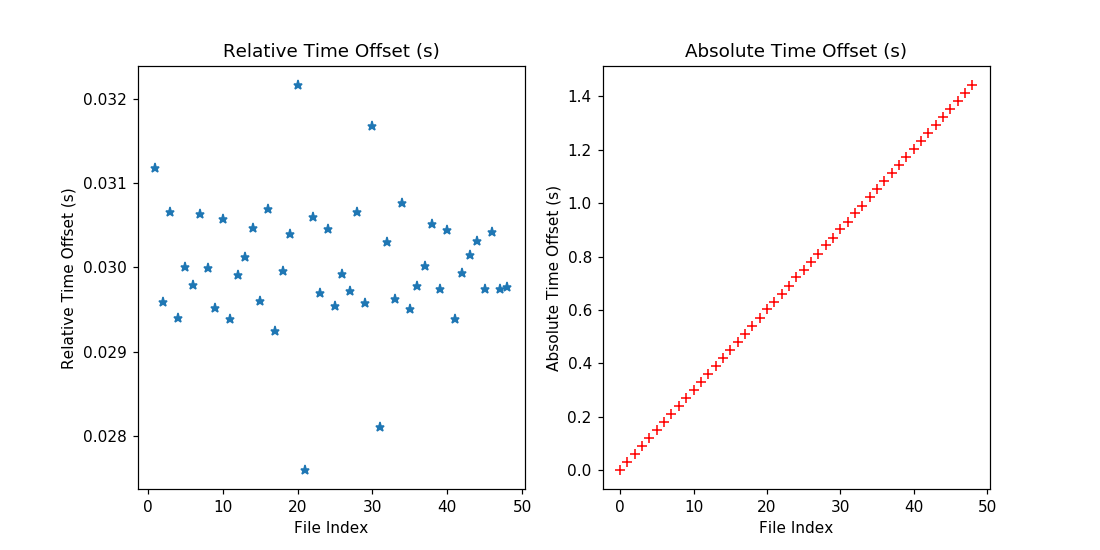

In [3]:
o_file_time_stamp.display()

# List Files Loaded 

In [10]:
o_file_time_stamp.print_result()

Tab(children=(Textarea(value='file name -> (current image acquistion time - previous image acquisition time) \n\n20180726_test_0000_0000.tiff -> nan\n20180726_test_0000_0001.tiff -> 0.031178951263427734\n20180726_test_0000_0002.tiff -> 0.029585838317871094\n20180726_test_0000_0003.tiff -> 0.03065776824951172\n20180726_test_0000_0004.tiff -> 0.029403209686279297\n20180726_test_0000_0005.tiff -> 0.030010223388671875\n20180726_test_0000_0006.tiff -> 0.029788970947265625\n20180726_test_0000_0007.tiff -> 0.03063225746154785\n20180726_test_0000_0008.tiff -> 0.029996395111083984\n20180726_test_0000_0009.tiff -> 0.029517173767089844\n20180726_test_0000_0010.tiff -> 0.030571699142456055\n20180726_test_0000_0011.tiff -> 0.029389381408691406\n20180726_test_0000_0012.tiff -> 0.029906272888183594\n20180726_test_0000_0013.tiff -> 0.030124187469482422\n20180726_test_0000_0014.tiff -> 0.03047466278076172\n20180726_test_0000_0015.tiff -> 0.029602527618408203\n20180726_test_0000_0016.tiff -> 0.030698060989379883\n20180726_test_0000_0017.tiff -> 0.02924823760986328\n20180726_test_0000_0018.tiff -> 0.029955148696899414\n20180726_test_0000_0019.tiff -> 0.030393123626708984\n20180726_test_0000_0020.tiff -> 0.032166481018066406\n20180726_test_0000_0021.tiff -> 0.02758932113647461\n20180726_test_0000_0022.tiff -> 0.030596256256103516\n20180726_test_0000_0023.tiff -> 0.029697418212890625\n20180726_test_0000_0024.tiff -> 0.03046250343322754\n20180726_test_0000_0025.tiff -> 0.02954697608947754\n20180726_test_0000_0026.tiff -> 0.029926300048828125\n20180726_test_0000_0027.tiff -> 0.02972102165222168\n20180726_test_0000_0028.tiff -> 0.03065633773803711\n20180726_test_0000_0029.tiff -> 0.029581785202026367\n20180726_test_0000_0030.tiff -> 0.03168630599975586\n20180726_test_0000_0031.tiff -> 0.02809929847717285\n20180726_test_0000_0032.tiff -> 0.030298233032226562\n20180726_test_0000_0033.tiff -> 0.029627561569213867\n20180726_test_0000_0034.tiff -> 0.030769824981689453\n20180726_test_0000_0035.tiff -> 0.029502391815185547\n20180726_test_0000_0036.tiff -> 0.029775142669677734\n20180726_test_0000_0037.tiff -> 0.030012130737304688\n20180726_test_0000_0038.tiff -> 0.030513286590576172\n20180726_test_0000_0039.tiff -> 0.029741764068603516\n20180726_test_0000_0040.tiff -> 0.030449390411376953\n20180726_test_0000_0041.tiff -> 0.029384374618530273\n20180726_test_0000_0042.tiff -> 0.029933452606201172\n20180726_test_0000_0043.tiff -> 0.030142545700073242\n20180726_test_0000_0044.tiff -> 0.030309438705444336\n20180726_test_0000_0045.tiff -> 0.029749155044555664\n20180726_test_0000_0046.tiff -> 0.030418872833251953\n20180726_test_0000_0047.tiff -> 0.029741287231445312\n20180726_test_0000_0048.tiff -> 0.02977299690246582', layout=Layout(height='300px', width='100%')), Textarea(value='file name -> (current image acquistion time - first image acquisition time) \n\n20180726_test_0000_0000.tiff -> 0.0\n20180726_test_0000_0001.tiff -> 0.031178951263427734\n20180726_test_0000_0002.tiff -> 0.06076478958129883\n20180726_test_0000_0003.tiff -> 0.09142255783081055\n20180726_test_0000_0004.tiff -> 0.12082576751708984\n20180726_test_0000_0005.tiff -> 0.15083599090576172\n20180726_test_0000_0006.tiff -> 0.18062496185302734\n20180726_test_0000_0007.tiff -> 0.2112572193145752\n20180726_test_0000_0008.tiff -> 0.24125361442565918\n20180726_test_0000_0009.tiff -> 0.270770788192749\n20180726_test_0000_0010.tiff -> 0.3013424873352051\n20180726_test_0000_0011.tiff -> 0.3307318687438965\n20180726_test_0000_0012.tiff -> 0.3606381416320801\n20180726_test_0000_0013.tiff -> 0.3907623291015625\n20180726_test_0000_0014.tiff -> 0.4212369918823242\n20180726_test_0000_0015.tiff -> 0.4508395195007324\n20180726_test_0000_0016.tiff -> 0.4815375804901123\n20180726_test_0000_0017.tiff -> 0.5107858180999756\n20180726_test_0000_0018.tiff -> 0.540740966796875\n20180726_test_0000_0019.tiff -> 0.571134090423584\n20180726_test_0000_0020.tiff -> 0.6033005714416504\n20180726_test_0000_0021.tiff -> 0.63088989257